In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 22 16:52:40 2018

@author: davecao
"""

# %% 1. Import numpy,statsmodels, matplotlib
%matplotlib inline
# numpy
import numpy as np
# statsmodels
import statsmodels.api as sm
# matplotlib
import matplotlib.pyplot as plt

# %% author
__author__ = "Kousuke Tsuchiya"
__studentId__ = "s1f101700158"

In [7]:
# %% 2. Read the data file -  task7_1_1_data.csv by numpy'loadtxt()
data = np.loadtxt("data/task7_1_1_data.csv", comments="#",delimiter=",")


In [45]:
x = data[:, 0:1]
Y = data[:, 1:2]
X = sm.add_constant(x)

In [52]:
# Model: y ~ ax + c
model = sm.OLS(Y, X)
results = model.fit()
value = results.params
# Write down c value obtained from OLS
__constant__ = value[0]
# Write down a value
__slope__ = value[1]
# Write down the condition number
__condo__ = results.condition_number
results.params

array([ 10.04773795,   0.64439664])

In [38]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5614
Date:                Mon, 28 May 2018   Prob (F-statistic):              0.455
Time:                        16:12:30   Log-Likelihood:                -373.20
No. Observations:                 100   AIC:                             748.4
Df Residuals:                      99   BIC:                             751.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7187      0.959      0.749      0.4

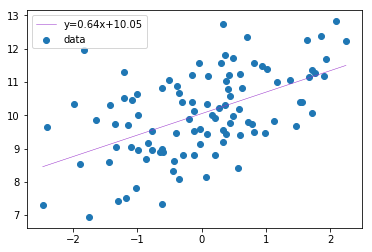

In [74]:
### Regression line
plt.scatter(x, Y)
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = results.predict(x_pred2)

plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=0.5)
# Set attributes for graph
txt = "y={:.2f}x+{:.2f}".format(results.params[1], results.params[0])
plt.legend([txt, "data"], frameon=True)
### the true line
#plt.plot(x, x*0.64+10.05, '.')
